# 1

Regularization. Using the accompanying Hitters dataset, we will explore
regression models to predict a player's Salary from other variables. You must
python.
https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

# 1.1

Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np

In [4]:
df=pd.read_csv("/Users/zhouyihan/Desktop/Hitters.csv",index_col=0)
df=df.drop(columns=['League','Division','NewLeague'])
df=df.dropna()
target=df['Salary']
data=df.drop(['Salary'], axis=1)

In [5]:
print(df)

                   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
-Alan Ashby          315    81      7    24   38     39     14    3449    835   
-Alvin Davis         479   130     18    66   72     76      3    1624    457   
-Andre Dawson        496   141     20    65   78     37     11    5628   1575   
-Andres Galarraga    321    87     10    39   42     30      2     396    101   
-Alfredo Griffin     594   169      4    74   51     35     11    4408   1133   
-Al Newman           185    37      1    23    8     21      2     214     42   
-Argenis Salazar     298    73      0    24   24      7      3     509    108   
-Andres Thomas       323    81      6    26   32      8      2     341     86   
-Andre Thornton      401    92     17    49   66     65     13    5206   1332   
-Alan Trammell       574   159     21   107   75     59     10    4631   1300   
-Alex Trevino        202    53      4    31   26     27      9    1876    467   
-Andy VanSlyke       418   1

In [6]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [7]:
n = 100
alphas = 10 ** np.linspace(-2,10,n)

In [8]:
coefs=[]
for i in alphas:
    lasso=Lasso(alpha = i, max_iter=5000, normalize=True)
    lasso.fit(data,target)
    coefs.append(lasso.coef_)

Text(0.5, 1.0, 'Coefficients Trajectory')

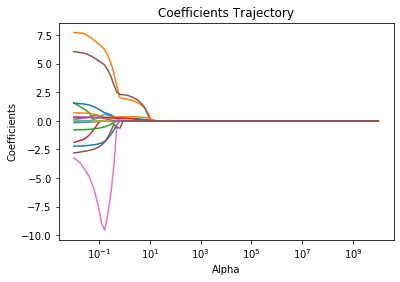

In [9]:
fig = plt.gca()
fig.plot(alphas, coefs)
fig.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients Trajectory')

The plot indicates that we can choose alpha equal to 10.

In [10]:
Lassomodel = Lasso(alpha = 10, max_iter = 5000, normalize = True).fit(data,target)
coef2 = pd.Series(Lassomodel .coef_, index=data.columns)
print(coef2)

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


The final three predictors which remain in the model are "Hits","CRuns","CRBI".

#Find optimal vlaue:

In [11]:
lassocv = LassoCV(cv=5, max_iter = 5000,normalize = True)
lassocv.fit(data, target)
alphaopt = lassocv.alpha_
print("The optimal value of the regularization penality is", alphaopt)

The optimal value of the regularization penality is 0.13691039485958048


In [12]:
n = np.sum(lassocv.coef_ != 0)

In [20]:
Lassomodel2 = Lasso(alpha=alphaopt, max_iter = 4000, normalize = True).fit(data, target)
print(pd.Series(Lassomodel2.coef_, index=data.columns))
n = np.sum(Lassomodel2.coef_ != 0)
print('The number of predictors left in the model is',n )

AtBat     -1.895082
Hits       6.455555
HmRun     -0.000000
Runs      -0.000000
RBI        0.349806
Walks      5.053509
Years     -9.587424
CAtBat    -0.008710
CHits      0.000000
CHmRun     0.557524
CRuns      0.789045
CRBI       0.337133
CWalks    -0.564136
PutOuts    0.285458
Assists    0.225658
Errors    -2.039256
dtype: float64
The number of predictors left in the model is 13


## 1.2

Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal vaule of the regularization penalty.

In [16]:
from sklearn.linear_model import Ridge, RidgeCV

In [17]:
coefs=[]
for j in alphas:
    ridge=Ridge(alpha = j,normalize=True)
    ridge.fit(data, target)
    coefs.append(ridge.coef_)

Text(0.5, 1.0, 'Ridge Coefficients Trajectory')

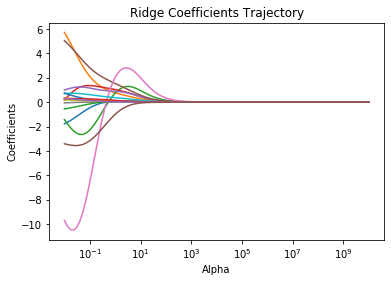

In [18]:
figR = plt.gca()
figR.plot(alphas, coefs)
figR.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients Trajectory')

In [19]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(data,target)
print("The optimal value of the regularization penality is", ridgecv.alpha_)

The optimal value of the regularization penality is 0.01


# 2. short answer

Q: Explain in your own words the bias-variance tradeoff. What
role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance.

A: Bias-variance tradeoff is the property of a set of predictive models whereby models with a lower bias in parameter estimation have a higher variance of the parameter estimates, and vice versa.

When the bias is low and variance is high, the test modle will be overfitting. And regularization coule avoid it by setting the coefficient of irrelevant predictors close to zero or equal to zero. When the number of predictors decreases, bias will increase and variance will decrease.

Based on the model above, when we increase the value of alpha, the bias increases and variance decreases, and vice versa.